In [38]:
import Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ ChainRulesCore
  ✓ IJulia
  ✓ DataStructures
  ✓ SortingAlgorithms
  ✓ Reactive
  ✓ Interpolations
  ✓ Colors
  ✓ StatsBase
  ✓ Graphics
  ✓ Widgets
  ✓ SpecialFunctions
  ✓ OpenEXR
  ✓ FFTW
  ✓ FFTViews
  ✓ ColorVectorSpace
  ✓ ImageCore
  ✓ WebIO
  ✓ ColorSchemes
  ✓ ImageShow
  ✓ ImageMorphology
  ✓ ImageAxes
  ✓ Netpbm
  ✓ PNGFiles
  ✓ ImageTransformations
  ✓ ImageMagick
  ✓ ImageIO
  ✓ CSSUtil
  ✓ ImageDistances
  ✓ ImageMetadata
  ✓ JSExpr
  ✓ ImageContrastAdjustment
  ✓ PlotUtils
  ✓ Knockout
  ✓ RecipesPipeline
  ✓ PlotThemes
  ✓ InteractBase
  ✓ ImageFiltering
  ✓ Interact
  ✓ Revealables
  ✓ ImageQualityIndexes
  ✓ Images
  ✓ Plots
  42 dependencies successfully precompiled in 47 seconds (162 already precompiled)
  10 dependencies precompiled but different versions are currently loaded. Restart julia

In [39]:
using Plots

## 1.5 Secant method

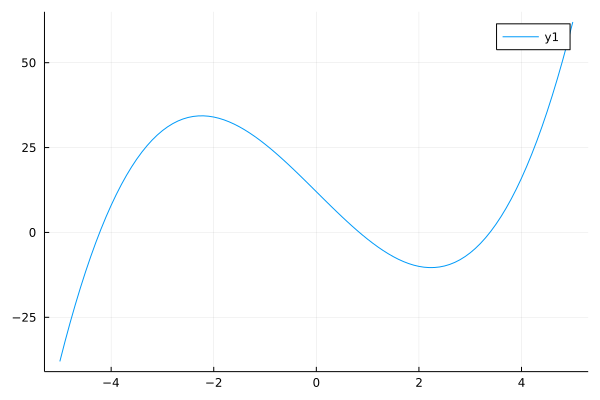

In [49]:
f(x) = x^3 -15*x + 12
plot(f, -5:0.1:5)

In [27]:
f(x) = x^3 -15*x + 12

# after substituting all these formulas we can get:
# x_intercept = x1 - y1 * (x1-x2) / (y1-y2)
function find_x_intercept(f, x1, x2)
    x_intercept = 0
    println("x1: $(x1), x2: $(x2)")
    y1, y2 = f(x1), f(x2)

    # line equation: y = k*x + b
    k = (y1-y2) / (x1-x2)
    b = y1 - k*x1

    println("secant function: y = $(k)*x + $(b)")
    # find x-intercept, with 0 = kx + b
    x_intercept = -b / k
    println("x intercept = $(x_intercept)")

    return x_intercept
end

find_x_intercept(f, 3, 4)

x1: 3, x2: 4
secant function: y = 22.0*x + -72.0
x intercept = 3.272727272727273


3.272727272727273

In [31]:
f(x) = x^3 -15*x + 12

function choose_point_with_shortest_distance_to_intercept(x1, x2, x_intercept)
    if abs(x_intercept - x1) < abs(x_intercept - x2)
        return x1
    else
        return x2
    end
end

function secant(f, x1, x2, iterations=4, tolerance=10^-5)
    i = 0
    x_intercept = 0
    while i < iterations
        x_intercept = find_x_intercept(f, x1, x2)
        println("$(i): x1=$(x1), x2=$(x2), x_intercept=$(x_intercept)\n")
        if abs(x_intercept - x2) <= tolerance
            println("Reached desired tolerance - root found!")
            return x_intercept
        end
        
        x1 = choose_point_with_shortest_distance_to_intercept(x1, x2, x_intercept)
        x2 = x_intercept
        i += 1
    end
    return x_intercept
end

secant(f, 3, 4, 10)

x1: 3, x2: 4
secant function: y = 22.0*x + -72.0
x intercept = 3.272727272727273
0: x1=3, x2=4, x_intercept=3.272727272727273

x1: 3, x2: 3.272727272727273
secant function: y = 14.528925619834714*x + -49.58677685950414
x intercept = 3.41296928327645
1: x1=3, x2=3.272727272727273, x_intercept=3.41296928327645

x1: 3.272727272727273, x2: 3.41296928327645
secant function: y = 18.528820784600807*x + -62.67734285328408
x intercept = 3.382694645380501
2: x1=3.272727272727273, x2=3.41296928327645, x_intercept=3.382694645380501

x1: 3.41296928327645, x2: 3.382694645380501
secant function: y = 19.636015311862074*x + -66.45616376543859
x intercept = 3.384401708288166
3: x1=3.41296928327645, x2=3.382694645380501, x_intercept=3.384401708288166

x1: 3.382694645380501, x2: 3.384401708288166
secant function: y = 19.345195523392057*x + -65.47240922421037
x intercept = 3.3844273708705424
4: x1=3.382694645380501, x2=3.384401708288166, x_intercept=3.3844273708705424

x1: 3.384401708288166, x2: 3.38442737

3.384427347557792

### Secant practice problems

### 1

In [36]:
f(x) = -x^3 + 4*x^2 - 7
secant(f, 1,2)


x1: 1, x2: 2
secant function: y = 5.0*x + -9.0
x intercept = 1.8
0: x1=1, x2=2, x_intercept=1.8

x1: 2, x2: 1.8
secant function: y = 4.36*x + -7.720000000000001
x intercept = 1.7706422018348624
1: x1=2, x2=1.8, x_intercept=1.7706422018348624

x1: 1.8, x2: 1.7706422018348624
secant function: y = 4.72023903711808*x + -8.368430266812544
x intercept = 1.7728827292445448
2: x1=1.8, x2=1.7706422018348624, x_intercept=1.7728827292445448

x1: 1.7706422018348624, x2: 1.7728827292445448
secant function: y = 4.756671766440956*x + -8.432939594879656
x intercept = 1.772865568394971
3: x1=1.7706422018348624, x2=1.7728827292445448, x_intercept=1.772865568394971



1.772865568394971

## 2

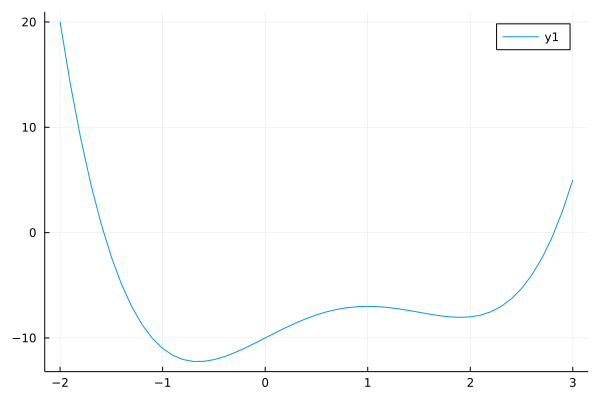

In [48]:
f(x) = x^4 - 3*x^3 + 5*x - 10
plot(f, -2:0.1:3)

In [51]:
secant(f, 2,3, 10)

x1: 2, x2: 3
secant function: y = 4.0*x + -18.0
x intercept = 4.5
0: x1=2, x2=3, x_intercept=4.5

x1: 3, x2: 4.5
secant function: y = 27.75*x + -89.25
x intercept = 3.2162162162162162
1: x1=3, x2=4.5, x_intercept=3.2162162162162162

x1: 3, x2: 3.2162162162162162
secant function: y = 13.992695398100809*x + -47.97808619430243
x intercept = 3.428795155564836
2: x1=3, x2=3.2162162162162162, x_intercept=3.428795155564836

x1: 3.2162162162162162, x2: 3.428795155564836
secant function: y = 18.12842954968826*x + -61.2795014385972
x intercept = 3.3802984020560665
3: x1=3.2162162162162162, x2=3.428795155564836, x_intercept=3.3802984020560665

x1: 3.428795155564836, x2: 3.3802984020560665
secant function: y = 19.773404291101052*x + -66.9197828629799
x intercept = 3.3843329088808902
4: x1=3.428795155564836, x2=3.3802984020560665, x_intercept=3.3843329088808902

x1: 3.3802984020560665, x2: 3.3843329088808902
secant function: y = 19.32018164899407*x + -65.38775509009004
x intercept = 3.3844275523928

3.3844273475479603

### 3

In [59]:
f(x) = exp(1)^(2*x) - 3 - 4*sin(x)

f (generic function with 1 method)

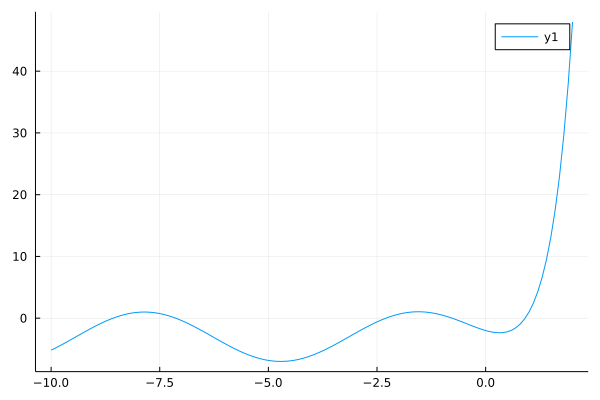

In [64]:
plot(f, -10:0.1:2)

In [65]:
secant(f, -4, -2)

x1: -4, x2: -2
secant function: y = 3.3411899323976355*x + 7.337885210986732
x intercept = -2.196189189915663
0: x1=-4, x2=-2, x_intercept=-2.196189189915663

x1: -2, x2: -2.196189189915663
secant function: y = 2.0398743712120946*x + 4.73525408861565
x intercept = -2.321345939457026
1: x1=-2, x2=-2.196189189915663, x_intercept=-2.321345939457026

x1: -2.196189189915663, x2: -2.321345939457026
secant function: y = 2.5601162331647975*x + 5.877803641977772
x intercept = -2.2959128049868553
2: x1=-2.196189189915663, x2=-2.321345939457026, x_intercept=-2.2959128049868553

x1: -2.321345939457026, x2: -2.2959128049868553
secant function: y = 2.710433702402483*x + 6.226742488822131
x intercept = -2.2973232967487274
3: x1=-2.321345939457026, x2=-2.2959128049868553, x_intercept=-2.2973232967487274



-2.2973232967487274

In [66]:
secant(f, 1, 1.2)

x1: 1, x2: 1.2
secant function: y = 16.35923938536816*x + -15.336067225669096
x intercept = 0.937456006627411
0: x1=1, x2=1.2, x_intercept=0.937456006627411

x1: 1, x2: 0.937456006627411
secant function: y = 11.626169172875176*x + -10.602997013176113
x intercept = 0.9119940416757215
1: x1=1, x2=0.937456006627411, x_intercept=0.9119940416757215

x1: 0.937456006627411, x2: 0.9119940416757215
secant function: y = 10.30586782029187*x + -9.365272579638596
x intercept = 0.9087320682687899
2: x1=0.937456006627411, x2=0.9119940416757215, x_intercept=0.9087320682687899

x1: 0.9119940416757215, x2: 0.9087320682687899
secant function: y = 9.898869741339377*x + -8.994092756660459
x intercept = 0.9085979502386606
3: x1=0.9119940416757215, x2=0.9087320682687899, x_intercept=0.9085979502386606



0.9085979502386606

### 4

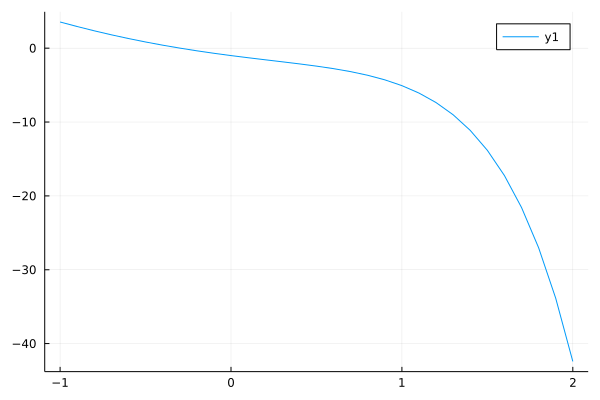

In [84]:
f(x) = 3*x^2 - 2* sin(x) + x - exp(2*x)
plot(f, -1:0.1:2)

In [85]:
f(-1), f(0)

(3.5476066863791806, -1.0)

In [91]:
secant(f, 0,-1)

x1: 0, x2: -1
secant function: y = -4.547606686379181*x + -1.0
x intercept = -0.21989588567436186
0: x1=0, x2=-1, x_intercept=-0.21989588567436186

x1: 0, x2: -0.21989588567436186
secant function: y = -3.2617809371037074*x + -1.0
x intercept = -0.30658098115195564
1: x1=0, x2=-0.21989588567436186, x_intercept=-0.30658098115195564

x1: -0.21989588567436186, x2: -0.30658098115195564
secant function: y = -3.6927755836532064*x + -1.0947739495239106
x intercept = -0.29646370994493726
2: x1=-0.21989588567436186, x2=-0.30658098115195564, x_intercept=-0.29646370994493726

x1: -0.30658098115195564, x2: -0.29646370994493726
secant function: y = -3.8132020242824174*x + -1.131694405848652
x intercept = -0.2967832280173035
3: x1=-0.30658098115195564, x2=-0.29646370994493726, x_intercept=-0.2967832280173035



-0.2967832280173035

## Bisection method

Desctiption taken from [here](https://www.math.hkust.edu.hk/~machas/numerical-methods-for-engineers.pdf), from [this](https://www.coursera.org/learn/numerical-methods-engineers/lecture/8f5iB/bisection-method-lecture-13) coursera course 

In [31]:
function bisection(f, x0, x1, iterations=3)
    best_root_approximation = -1
    while iterations > 0        
        iterations -= 1
        y0, y1 = f(x0), f(x1)
        if y0 * y1 > 0
            prinln("Positive sign means wrong initial guess with x0=$(x0) and x1=$(x1)!")
            return -1
        end
        best_root_approximation = x_next = (x0 + x1) / 2
        println("Next x = $(x_next)")

        # choose a new pair, that "brackets" the root
        y_next = f(x_next)
        if y0 * y_next > 0
            x0 = x_next
            x1 = x1
        else
            x0 = x0
            x1 = x_next
        end
    end
    return best_root_approximation
end

f(x) = x^2 - 2
root = bisection(f, 1, 2, 13)
println("SQRT(2) with bisection method: $(root), real: $(sqrt(2))")

Next x = 1.5
Next x = 1.25
Next x = 1.375
Next x = 1.4375
Next x = 1.40625
Next x = 1.421875
Next x = 1.4140625
Next x = 1.41796875
Next x = 1.416015625
Next x = 1.4150390625
Next x = 1.41455078125
Next x = 1.414306640625
Next x = 1.4141845703125
SQRT(2) with bisection method: 1.4141845703125, real: 1.4142135623730951


In [33]:
f(x) = x^2 - 3
root = bisection(f, 1, 2, 13)
println("SQRT(2) with bisection method: $(root), real: $(sqrt(3))")

Next x = 1.5
Next x = 1.75
Next x = 1.625
Next x = 1.6875
Next x = 1.71875
Next x = 1.734375
Next x = 1.7265625
Next x = 1.73046875
Next x = 1.732421875
Next x = 1.7314453125
Next x = 1.73193359375
Next x = 1.732177734375
Next x = 1.7320556640625
SQRT(2) with bisection method: 1.7320556640625, real: 1.7320508075688772


## Newton's method

In [5]:
function newton(f, f_prime, x_guess, iterations=7, tolerance=10^-5)
    x = x_guess
    root = 0
    i = 1
    while i <= iterations
        x_next = x - (f(x) / f_prime(x))
        root = x_next
        println("On iteration $(i) f($(x_next)) = $(f(x))")
        if abs(x_next - x) < tolerance
            println("Stopping at iteration $(i) due to root difference is < than tolerance $(tolerance)")
            return root
        end
        i += 1
        x = x_next
    end
end

newton (generic function with 3 methods)

In [6]:
f(x) = x^2 - 2
f_prime(x) = 2*x
newton(f, f_prime, 10)

On iteration 1 f(5.1) = 98
On iteration 2 f(2.7460784313725486) = 24.009999999999998
On iteration 3 f(1.7371948743795982) = 5.540946751249517
On iteration 4 f(1.444238094866232) = 1.0178460315707478
On iteration 5 f(1.4145256551487377) = 0.08582367466284291
On iteration 6 f(1.4142135968022693) = 0.0008828290739657518
On iteration 7 f(1.4142135623730954) = 9.738041173434908e-8
Stopping at iteration 7 due to root difference is < than tolerance 1.0000000000000003e-5


1.4142135623730954

In [44]:
f(x) = x^2 - 3
f_prime(x) = 2*x
newton(f, f_prime, 2)

On iteration 1 f(1.75) = 1
On iteration 2 f(1.7321428571428572) = 0.0625
On iteration 3 f(1.7320508100147276) = 0.00031887755102077975
On iteration 4 f(1.7320508075688772) = 8.47267411785424e-9
Stopping at iteration 4 due to root difference is < than epsilon 1.0000000000000003e-5


1.7320508075688772

## Secant method (Coursera)

In [21]:
function approximate_derivative(f, x1, x2)
    y1, y2 = f(x1), f(x2)
    return (y1-y2) / (x1-x2)
end

f1(x) = 2*x
println(approximate_derivative(f1, 2, 3))

f2(x) = x^2 + 3*x - 1
println(approximate_derivative(f2, 2, 3))

2.0
8.0


In [29]:
# x_n+1 = x_n - f(x_n) /  f*(x_n)
function secant_coursera(f, x1, x2, iterations=7, tolerance=10^-5)
    i = 0
    while i < iterations
        x3 = x2 - (f(x2) / approximate_derivative(f, x2, x1))
        println("$(i): x3 = $(x3)")
        if abs(x3-x2) < tolerance
            println("Reached the tolerance of $(tolerance)")
            return x3
        end
        
        x1, x2 = x2, x3
        i += 1
    end
end

f(x) = x^2 - 2
root = secant_coursera(f, 1,2)

f(x) = x^2 - 3
root = secant_coursera(f, 1, 10, 100)

f(x) = x^3 -15*x + 12
root = secant_coursera(f, 3, 4, 10)

0: x3 = 1.3333333333333335
1: x3 = 1.4000000000000001
2: x3 = 1.4146341463414633
3: x3 = 1.41421143847487
4: x3 = 1.4142135620573204
Reached the tolerance of 1.0000000000000003e-5
0: x3 = 1.1818181818181817
1: x3 = 1.3252032520325203
2: x3 = 1.8213443396226414
3: x3 = 1.7205051836165723
4: x3 = 1.7317597309616692
5: x3 = 1.7320517810344518
6: x3 = 1.7320508074870735
Reached the tolerance of 1.0000000000000003e-5
0: x3 = 3.2727272727272725
1: x3 = 3.3548817060979674
2: x3 = 3.386268592696366
3: x3 = 3.384398481477109
4: x3 = 3.3844273197099044
5: x3 = 3.384427347558526
Reached the tolerance of 1.0000000000000003e-5


3.384427347558526

## 1.6 Introduction to the Julia Language

In [1]:
4//3

4//3

In [4]:
rad2deg(pi/2)

90.0

In [ ]:
pi

In [6]:
g(x,y) = x + y
g(2,5)

7

In [7]:
x = g(2,2)

4

In [8]:
x

4

In [9]:
a2 = [1:5]

1-element Vector{UnitRange{Int64}}:
 1:5

In [14]:
typeof(1:5)

UnitRange{Int64}